# IO

In [1]:
from PineBioML import IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

In [4]:
x.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column552,Column553,Column554,Column555,Column556,Column557,Column558,Column559,Column560,Column561
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [5]:
y.value_counts()

target
STANDING              556
LAYING                545
SITTING               508
WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
STAND_TO_LIE           49
SIT_TO_LIE             32
LIE_TO_STAND           27
LIE_TO_SIT             25
STAND_TO_SIT           23
SIT_TO_STAND           10
Name: count, dtype: int64

# Preprocessing

In [6]:
from PineBioML.preprocessing import Normalizer

x = Normalizer(method="StandardScaler").fit_transform(x)

In [7]:
from PineBioML.preprocessing import impute

# The imputer will drop the features within which more than 33.3% of values are unkown.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 1/3, strategy = "constant")
x = simple.fit_transform(x)

# Data overview

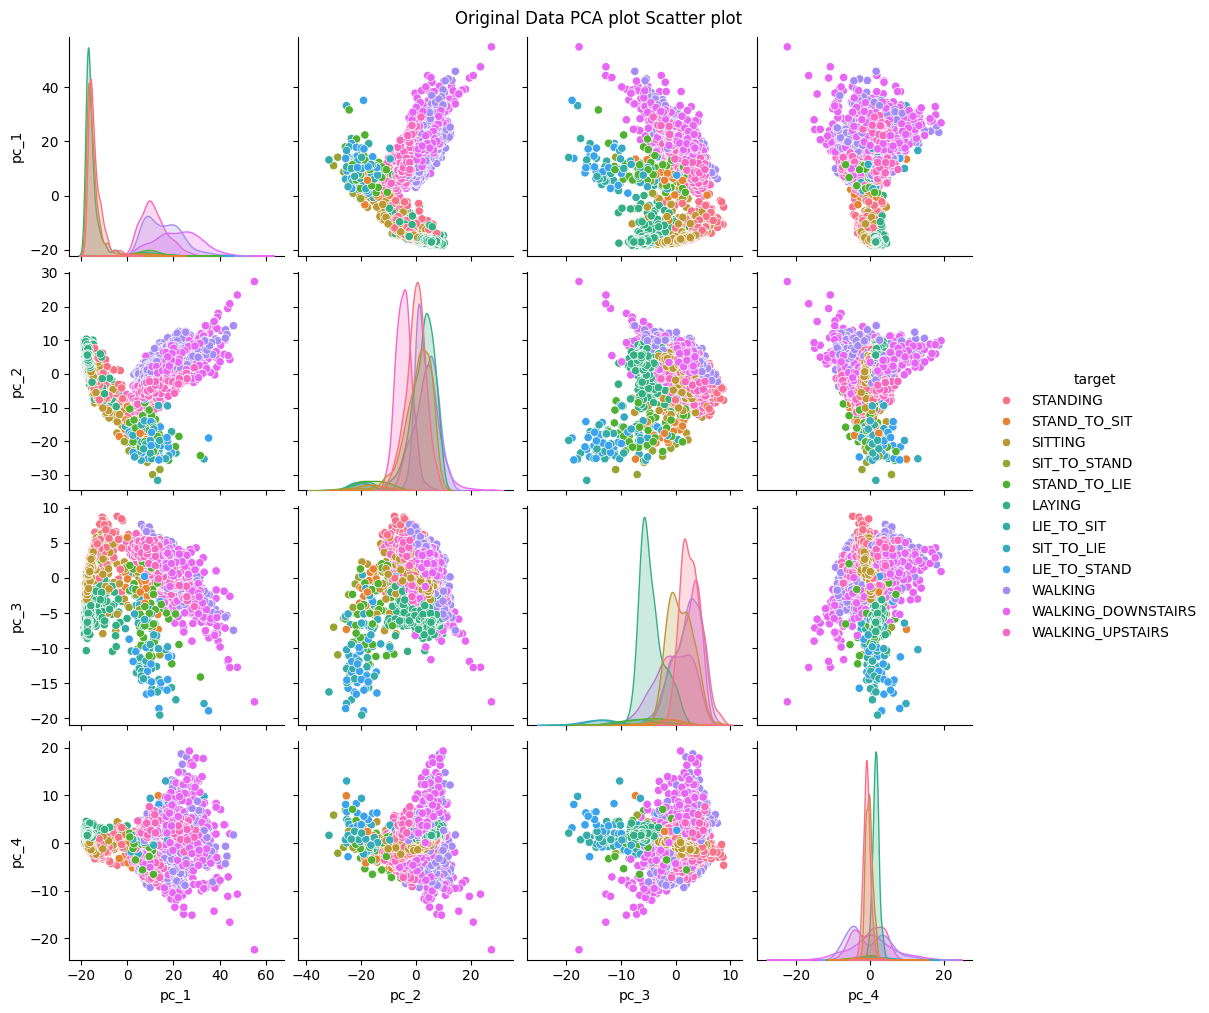

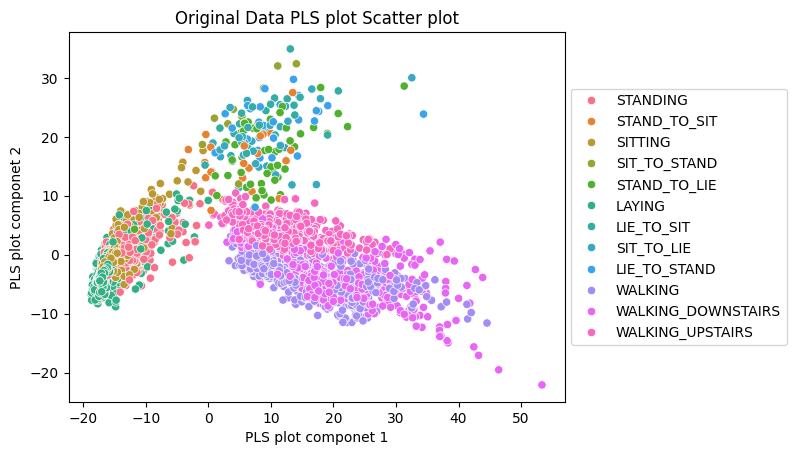

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


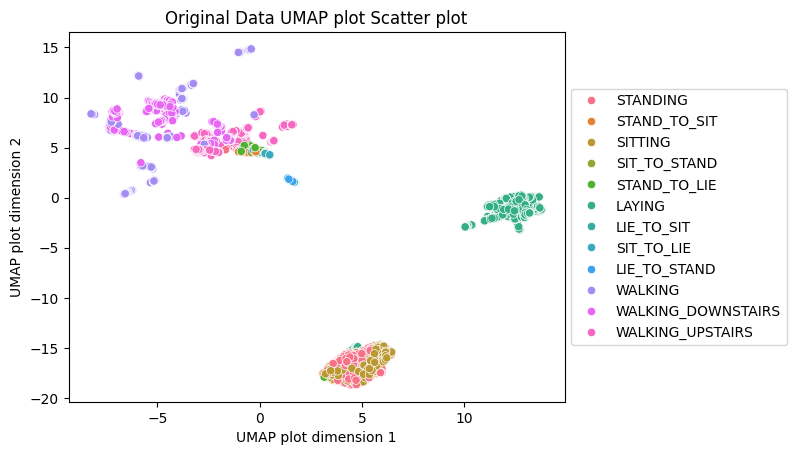

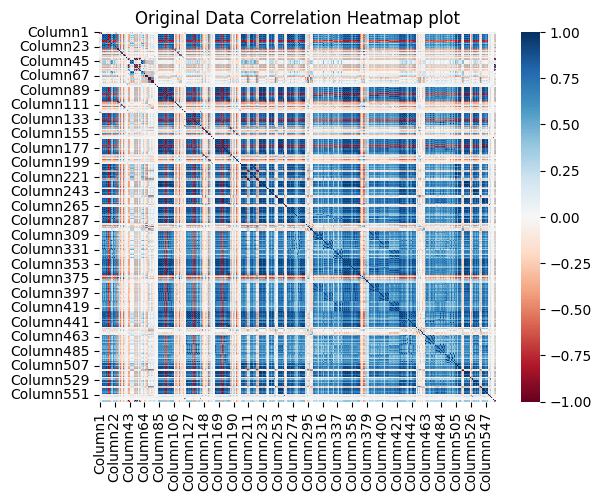

In [8]:
import PineBioML.report.utils as report_utils

report_utils.data_overview(x, y, is_classification=True, prefix="Original Data", save_fig=True, save_path="./output/images/", show_fig=True)

# Feature selection

In [9]:
from PineBioML.selection.classification import ensemble_selector

In [10]:
# Use several way to select top-k important features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
selector = ensemble_selector(k = 12)
selector.fit(x, y)

Using  c45  to score.


100%|██████████| 561/561 [00:00<00:00, 2033.75it/s]


c45  is done. Using 13.7217

Using  RF_gini  to score.
RF_gini  is done. Using 36.4143

Using  Lasso  to score.
Lasso  is done. Using 5.5127

Using  multi_Lasso  to score.
multi_Lasso  is done. Using 14.3223

Using  SVM  to score.
SVM  is done. Using 254.3416



In [11]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
selector.what_matters()

,DT_score_c45,RandomForest_gini,LassoLars,multi_Lasso,SVM,ensemble
Column53,0.985939,0.016277,NaN,NaN,NaN,4.159758
Column382,0.978497,NaN,1.044330,NaN,NaN,0.183331
Column41,0.978121,0.013068,NaN,NaN,0.004459,0.169593
Column57,0.977541,0.013745,NaN,NaN,NaN,1.097797
Column394,0.976553,NaN,NaN,NaN,NaN,0.305655
Column559,0.975999,0.013936,NaN,NaN,0.005489,0.706802
Column390,0.975445,NaN,NaN,NaN,NaN,0.091155
Column348,0.973724,NaN,NaN,NaN,NaN,-0.241931
Column50,0.971675,0.012848,1.191127,1.191127,0.004624,-1.875471
Column97,0.968929,NaN,NaN,NaN,NaN,-1.170179


In [12]:
x = selector.transform(x)

# Modeling

### Train test split

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=132, shuffle=True, stratify=y)

### Tuning a model

In [14]:
import PineBioML.model.supervised.Classification as tuner

In [15]:
svm = tuner.SVM_tuner(target="acc", kernel_seed=12, valid_seed = 345, optuna_seed = 6789)
svm.fit(x_train, y_train)

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


optuna seed 6789  |  validation seed 345  |  model seed 12
    SVM start tuning. it will take a while.
    optuna is better, best trial:  22


In [16]:
shap_values = svm.shap_explain(x_valid.sample(16))

100%|██████████| 16/16 [00:53<00:00,  3.36s/it]


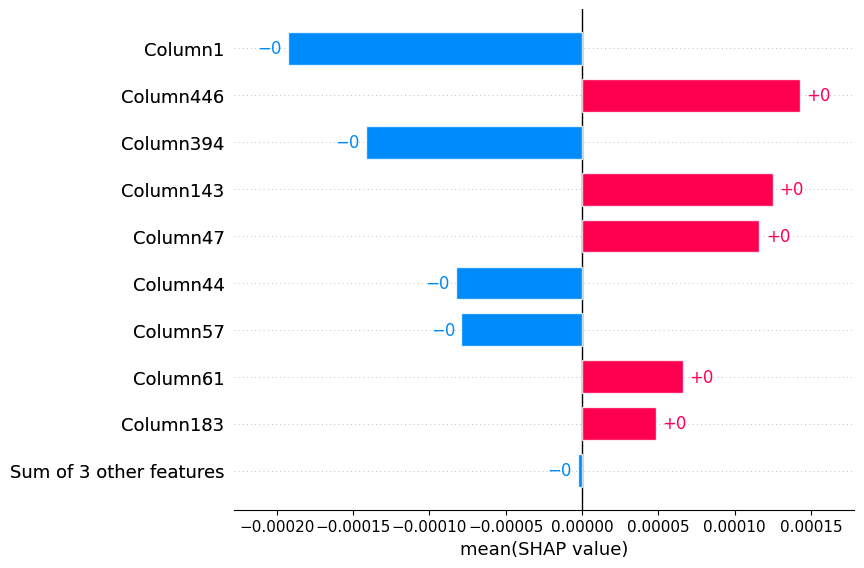

In [17]:
import shap
shap.plots.bar(shap_values[:, :, 2].mean(0))

In [18]:
svm.detail()

,parameter,dtype,lower_bound,upper_bound,result
SVM,None,None,None,None,None
,kernel,category,"[linear, poly, rbf, sigmoid]",None,rbf
,C,float,0.046022,4602.1734,1654.656892


In [19]:
svm.plot()

In [20]:
svm.reference()

{'optuna publication': 'https://dl.acm.org/doi/10.1145/3292500.3330701',
 'optuna document': 'https://optuna.org/',
 'sklearn publication': 'https://dl.acm.org/doi/10.5555/1953048.2078195',
 'SVM document': 'https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html',
 'SVM publication': 'https://citeseerx.ist.psu.edu/doc_view/pid/42e5ed832d4310ce4378c44d05570439df28a393'}

                   precision    recall  f1-score support
LAYING              0.989011       1.0  0.994475   180.0
LIE_TO_SIT               1.0     0.375  0.545455     8.0
LIE_TO_STAND        0.642857       1.0  0.782609     9.0
SITTING             0.894118  0.904762  0.899408   168.0
SIT_TO_LIE              0.75       0.6  0.666667    10.0
SIT_TO_STAND             0.4  0.666667       0.5     3.0
STANDING            0.916667  0.896739  0.906593   184.0
STAND_TO_LIE             0.5    0.6875  0.578947    16.0
STAND_TO_SIT             0.6     0.375  0.461538     8.0
WALKING             0.804598  0.853659  0.828402   164.0
WALKING_DOWNSTAIRS  0.732484  0.827338  0.777027   139.0
WALKING_UPSTAIRS    0.895161  0.716129  0.795699   155.0
                                                        
macro avg           0.760408  0.741899  0.728068  1044.0
weighted avg        0.866576  0.859195  0.858857  1044.0
accuracy                                0.859195  1044.0


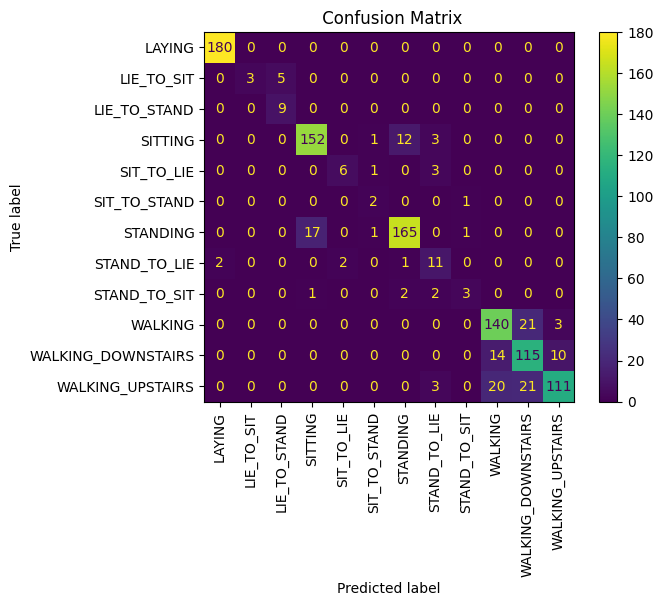

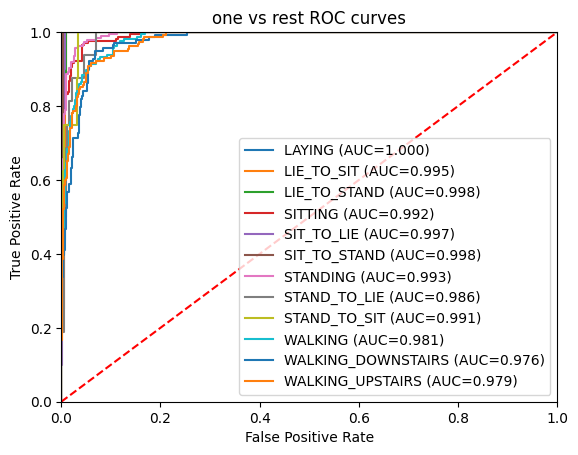

In [21]:
import PineBioML.report.utils as report_utils
report_utils.classification_summary(y_valid, svm.predict_proba(x_valid))